#### Задание 

1. Скачайте текст войны и мир (ссылка на github и гугл диск). 
2. Очистите его, оставив только русские буквы и символы пробела. 
3. Постройте матрицу переходных вероятностей. 
4. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; 
5. Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [111]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

import numpy as np
from hmmlearn import hmm
from hmmlearn.hmm import GaussianHMM

In [35]:
# Скачайте текст войны и мир
with open('WP/tom_1.txt', 'r') as f:
    text1 = f.read().lower()
with open('WP/tom_2.txt', 'r') as f:
    text2 = f.read().lower()
with open('WP/tom_3.txt', 'r') as f:
    text3 = f.read().lower()
with open('WP/tom_4.txt', 'r') as f:
    text4 = f.read().lower()
text = text1 + text2 + text3 + text4
len(text1), len(text2), len(text3), len(text4), len(text)

(717820, 756121, 821104, 698370, 2993415)

In [36]:
# Очистите его, оставив только русские буквы и символы пробела
text = re.sub('[^а-яё\s]','', text)
text = re.sub('\s+',' ', text)

In [85]:
# Постройте матрицу переходных вероятностей
RUS = 'аоуыэяеёюибвгдйжзклмнпрстфхцчшщьъ '
POS = {l: i for i, l in enumerate(RUS)}

probabilities = np.zeros((len(RUS), len(RUS)))
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))
df.head()

,а,о,у,ы,э,я,е,ё,ю,и,...,т,ф,х,ц,ч,ш,щ,ь,ъ,
а,0.000117,0.000090,0.001768,0.0,0.000011,0.034110,0.013626,0.0,0.010887,0.001667,...,0.068702,0.007596,0.013780,0.000961,0.010616,0.018350,0.003376,0.0,0.0,0.241617
о,0.000041,0.002046,0.000614,0.0,0.000234,0.006454,0.024412,0.0,0.004977,0.008459,...,0.071097,0.003127,0.005219,0.000735,0.013214,0.011096,0.001469,0.0,0.0,0.223742
у,0.000623,0.000352,0.000160,0.0,0.000735,0.002908,0.008836,0.0,0.041336,0.000511,...,0.059025,0.000527,0.013662,0.000336,0.032213,0.030966,0.011441,0.0,0.0,0.264716
ы,0.000000,0.000067,0.000224,0.0,0.000000,0.000045,0.067798,0.0,0.000000,0.001010,...,0.042183,0.000000,0.063376,0.000382,0.010551,0.029858,0.000112,0.0,0.0,0.263582
э,0.000000,0.000000,0.000000,0.0,0.000142,0.000000,0.000000,0.0,0.000000,0.000000,...,0.899376,0.000425,0.002834,0.000142,0.000000,0.000142,0.000000,0.0,0.0,0.005811


In [42]:
# Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р
start = POS['п']
end = POS['р']
prior = 1. / len(RUS)
for b in RUS:
    for c in RUS:
        proba = prior * probabilities[start, POS[c]] * probabilities[POS[b], POS[c]] * probabilities[POS[c], end]
        if proba > 0:
            print(''.join(['п', b, c, 'р']), proba)

паар 7.4014983379565245e-09
паор 6.492015594993091e-08
паур 3.766145248492359e-08
паэр 5.406232519314136e-14
паяр 3.939102314172337e-08
паер 4.105224575064391e-06
паир 1.4515181628053536e-08
пагр 9.678412454072856e-09
пакр 2.882616330661707e-07
памр 3.1842220619419654e-11
панр 6.65627732625315e-09
папр 1.8947801672303463e-07
парр 1.3977629817366371e-07
паср 2.0642146951342044e-09
патр 2.0325803030925505e-07
пафр 4.82154251444369e-08
пачр 1.7961119919336704e-09
пашр 2.339970110332053e-11
пащр 7.221423846110974e-12
па р 3.297345247483265e-07
поар 2.6269701023414622e-09
поор 1.4719597765123692e-06
поур 1.3085969872216199e-08
поэр 1.1896573556549042e-12
пояр 7.453828271973865e-09
поер 7.355031060905558e-06
поир 7.366728284773611e-08
погр 3.957741153586033e-08
покр 7.907856638766651e-08
помр 4.0139906933760476e-11
понр 6.866692202732177e-09
попр 1.9047328235902355e-07
порр 2.1447711999730525e-07
поср 2.875374488523407e-09
потр 2.1034254573656911e-07
пофр 1.9851345085014964e-08
почр 2.235654

In [106]:
# Используя матрицу переходных вероятностей сгенерируйте слово, 
# начинающееся с буквы “Б” и имеющее длину 8-мь символов

s = []
start = 'б'
s.append(start)
length = 8

while len(s) != 8:
    index = POS[s[-1]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    
    if next_char == ' ':
        continue
    
    s.append(next_char)

print (''.join(s))

быстикод


#### Задание 

1. Выберите ряд из предыдущих домашних заданий по временным рядам
2. Оцените его через HMM. 
3. “Постройте” (через среднее каждой компоненты) наивный прогноз ряда.


In [107]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [153]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [154]:
series_1 = all_series["Weekly closings of the Dow-Jones industrial average"]

In [155]:
values = series_1.values.reshape(-1,1)

In [156]:
for n in range(1, 20):
    model = GaussianHMM(n_components=n,
                        covariance_type="diag",
                        n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -894.2620483582104
2 -820.6341453620555
3 -786.837533266772
4 -752.0201472668986
5 -737.1181370073
6 -729.5671112589455
7 -713.7233991716982
8 -702.107540401491
9 -690.9838068209676
10 -691.2688696758202


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


11 -681.4134686012791


Fitting a model with 194 free scalar parameters with only 162 data points will result in a degenerate solution.


12 -676.9902555033763


Fitting a model with 223 free scalar parameters with only 162 data points will result in a degenerate solution.


13 -661.7695971697516


Fitting a model with 254 free scalar parameters with only 162 data points will result in a degenerate solution.


14 -653.0103460447066


Fitting a model with 287 free scalar parameters with only 162 data points will result in a degenerate solution.


15 -639.1017037793213


Fitting a model with 322 free scalar parameters with only 162 data points will result in a degenerate solution.


16 -628.4732215025128


Fitting a model with 359 free scalar parameters with only 162 data points will result in a degenerate solution.


17 -624.2786798846588


Fitting a model with 398 free scalar parameters with only 162 data points will result in a degenerate solution.


18 -616.6717562558217
19 -607.2664561677847


Fitting a model with 167 free scalar parameters with only 162 data points will result in a degenerate solution.


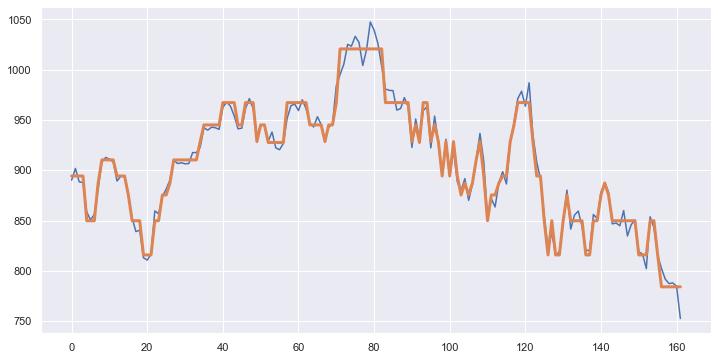

In [157]:
model = GaussianHMM(n_components=12,
                        covariance_type="diag",
                        n_iter=1000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)